# N2O ePS + ePSproc preliminary multi-orb analysis: core 1s events
29/09/20

15/11/20 - modified for N(1s) threshold, [for 550 - 620eV see original version on ePSdata](https://phockett.github.io/ePSdata/N2O-preliminary/N2O_1s_core_preliminary_ePSproc_290920.html).

12/02/21 - (this doc) extended energy range version looking at XS and gauges in more detail.

Paul Hockett

*** Preliminary results.

## Background

Basic analysis of N2O ePolyScat results for core ionization events, O(1s) and N(1s). For backgound and methods, see [ePSdata overview](https://phockett.github.io/ePSdata/about.html), [ePSdata methods](https://phockett.github.io/ePSdata/methods.html) and [ePS/ePSproc tutorial docs](https://epsproc.readthedocs.io/en/latest/ePS_ePSproc_tutorial/ePS_tutorial_080520.html).

For N2O results, see https://phockett.github.io/ePSdata/N2O-preliminary/

## This notebook

Here: more careful comparison of XS and $\beta$ for different calculation gauges.

Conclusion: very different absolute XS for L vs. V gauge, but $\beta$ and branching ratios are quite similar in both cases. Suggests abs. XS results are not accurate/realistic in one or both gauges, but other parameters are consistent, likely down to difference in form of the radial wavefunction in the two gauges (?), which the relative parameters are not very sensitive to.

## Setup

### Env

In [1]:
!hostname

Stimpy


In [2]:
!conda env list

# conda environments:
#
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\dataVis3D
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\dataVis3D-yt
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSdev
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ePSpkgTest2
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\fibre-sim
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\ipykernel_py2
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\pkgTest
                         C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\pypi-test
                        

### Load modules

In [3]:
import sys
import os
from pathlib import Path
import numpy as np
# import epsproc as ep
import xarray as xr

from datetime import datetime as dt
timeString = dt.now()

In [4]:
# For module testing, include path to module here, otherwise use global installation
if sys.platform == "win32":
    modPath = r'D:\code\github\ePSproc'  # Win test machine
    winFlag = True
else:
    modPath = r'/home/femtolab/github/ePSproc/'  # Linux test machine
    winFlag = False
    
sys.path.append(modPath)
import epsproc as ep
# # TODO: tidy this up!
# from epsproc.util import matEleSelector
# from epsproc.geomFunc import geomCalc, geomUtils
# from epsproc.geomFunc.lfblmGeom import lfblmXprod

# Plotters
from epsproc.plot import hvPlotters

# Multijob class dev code
from epsproc.classes.multiJob import ePSmultiJob

* pyevtk not found, VTK export not available. 


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
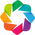

In [5]:
hvPlotters.setPlotters()
# import bokeh
# import holoviews as hv
# hv.extension('bokeh')

### Load data

In [6]:
# # Scan for subdirs, based on existing routine in getFiles()
fileBase = r'D:\VMs\Share\ePSshare\N2O\N20_wf'  # Test dir on Stimpy (Win machine)


In [7]:
N2Odata = ePSmultiJob(fileBase, verbose = 0)
keys = [0,1,2]  # Set for 1s datasets only (ugly!)
N2Odata.scanFiles(keys = keys)
N2Odata.jobsSummary()

Found 3 directories, with 36 files.

*** Job orb1 details
Key: orb1
Dir D:\VMs\Share\ePSshare\N2O\N20_wf\orb1_S, 13 file(s).
{   'batch': 'ePS N2O, batch N2O_wf, orbital orb1_S',
    'event': 'orb 1 ionization (O 1s, S/A1).',
    'orbE': -562.219888836424,
    'orbLabel': 'O 1s, S/A1'}

*** Job orb2 details
Key: orb2
Dir D:\VMs\Share\ePSshare\N2O\N20_wf\orb2_S, 13 file(s).
{   'batch': 'ePS N2O, batch N2O_wf, orbital orb2_S',
    'event': 'orb 2 ionization (N 1s, S/A1).',
    'orbE': -431.308631832806,
    'orbLabel': 'N 1s, S/A1'}

*** Job orb3 details
Key: orb3
Dir D:\VMs\Share\ePSshare\N2O\N20_wf\orb3_S, 10 file(s).
{   'batch': 'ePS N2O, batch N2O_wf, orbital orb3_S',
    'event': 'orb 3 ionization (N 1s, S/A1).',
    'orbE': -427.26774100883597,
    'orbLabel': 'N 1s, S/A1'}


## System properties
Here orbitals 1,2,3 are all core 1s orbitals, centred on:

1. O
2. N (central)
3. N (terminal)

*** Molecular structure


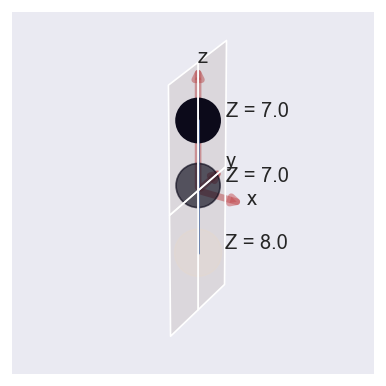


*** Molecular orbital list (from ePS output file)
EH = Energy (Hartrees), E = Energy (eV), NOrbGrp, OrbGrp, GrpDegen = degeneracies and corresponding orbital numbering by group in ePS, NormInt = single centre expansion convergence (should be ~1.0).


props,Sym,EH,Occ,E,NOrbGrp,OrbGrp,GrpDegen,NormInt
orb,,,,,,,,
1,S,-20.6612,2.0,-562.219889,1.0,1.0,1.0,0.979634
2,S,-15.8503,2.0,-431.308632,1.0,2.0,1.0,0.999998
3,S,-15.7018,2.0,-427.267741,1.0,3.0,1.0,0.983661
4,S,-1.6338,2.0,-44.457962,1.0,4.0,1.0,0.999465
5,S,-1.4519,2.0,-39.508211,1.0,5.0,1.0,0.999243
6,S,-0.8306,2.0,-22.601777,1.0,6.0,1.0,0.999545
7,P,-0.7759,2.0,-21.113314,1.0,7.0,2.0,0.999991
8,P,-0.7759,2.0,-21.113314,2.0,7.0,2.0,0.999991
9,S,-0.6985,2.0,-19.007153,1.0,8.0,1.0,0.999692



*** Warning: some orbital convergences outside single-center expansion convergence tolerance (0.01):
[[1.         0.97963433]
 [3.         0.98366107]]


In [8]:
N2Odata.molSummary()

In [9]:
# Quick manual fix for orb/job labels

N2Odata.jobLabel(key='orb2', lString = "(central)")
N2Odata.jobLabel(key='orb3', lString = "(terminal)")

## Plot cross-sections and betas

These are from ePolyScat's `getCro` function, and are LF (unaligned ensemble) results. This provides a good, if general, overview.

### Overview (all symmetries)

All gauges for comparison, and seperate plots for XS due to different scales.

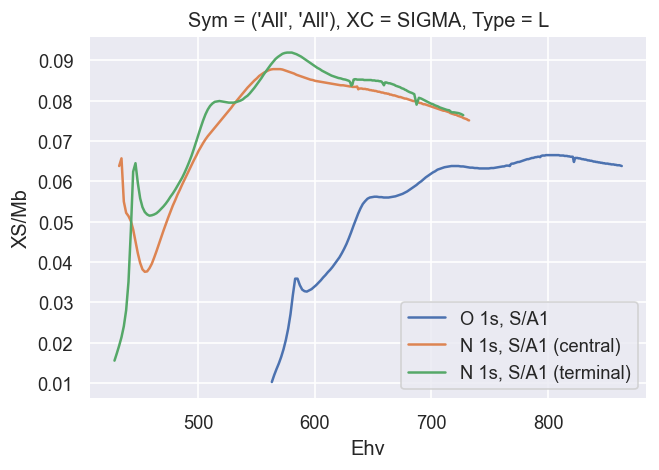

In [14]:
# Comparitive plot over datasets (all symmetries only)
Erange=[400, 900]
N2Odata.plotGetCroComp(pType='SIGMA', Etype='Ehv', Erange=Erange)

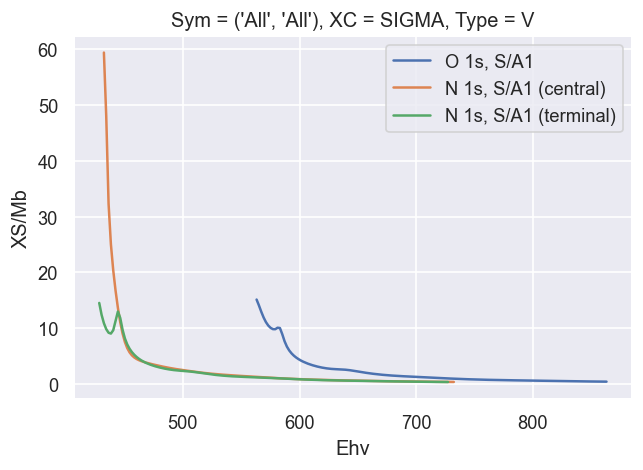

In [17]:
# Comparitive plot over datasets (all symmetries only)
Erange=[400, 900]
N2Odata.plotGetCroComp(pType='SIGMA', Etype='Ehv', Erange=Erange, pGauge = 'V')

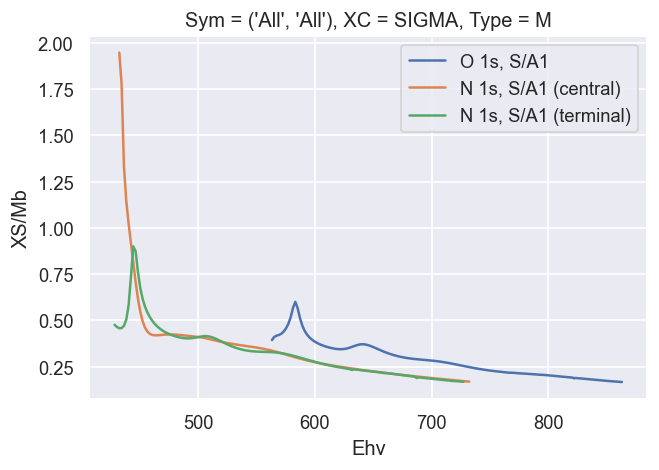

In [78]:
# Comparitive plot over datasets (all symmetries only)
Erange=[400, 900]
N2Odata.plotGetCroComp(pType='SIGMA', Etype='Ehv', Erange=Erange, pGauge = 'M')

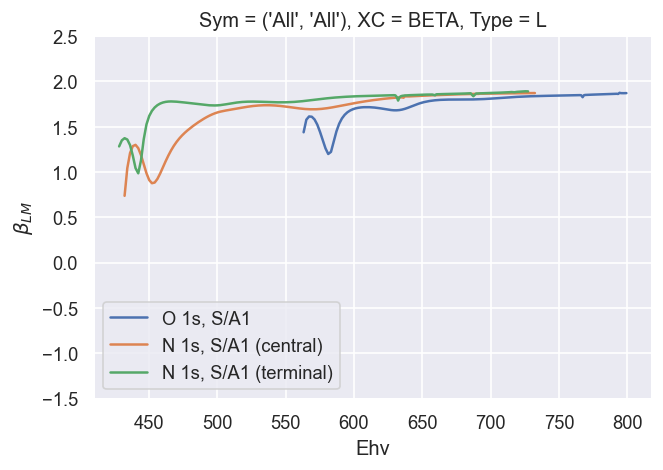

In [11]:
# Comparitive plot over datasets (all symmetries only)
N2Odata.plotGetCroComp(pType='BETA', Etype='Ehv', Erange=Erange)

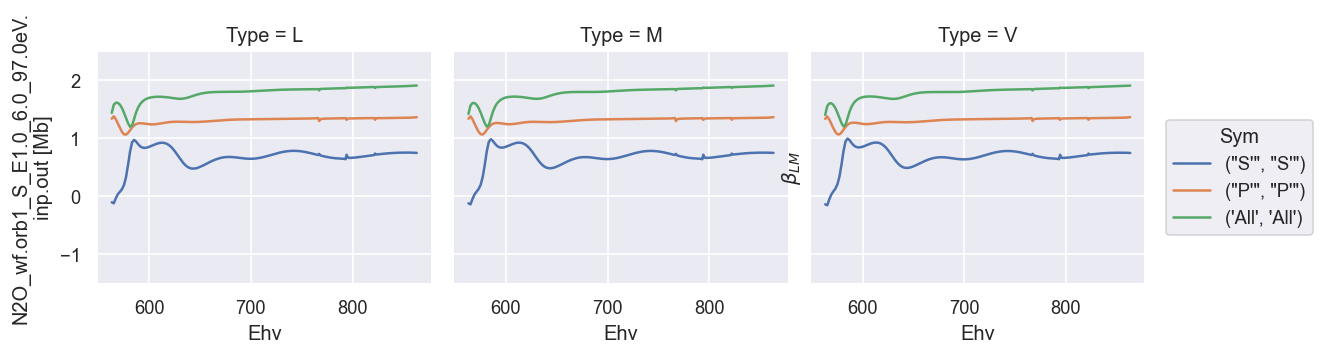

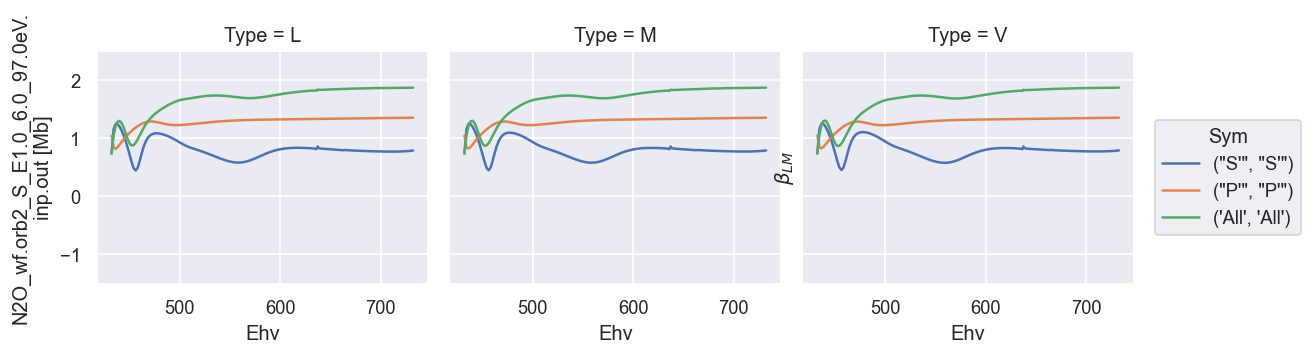

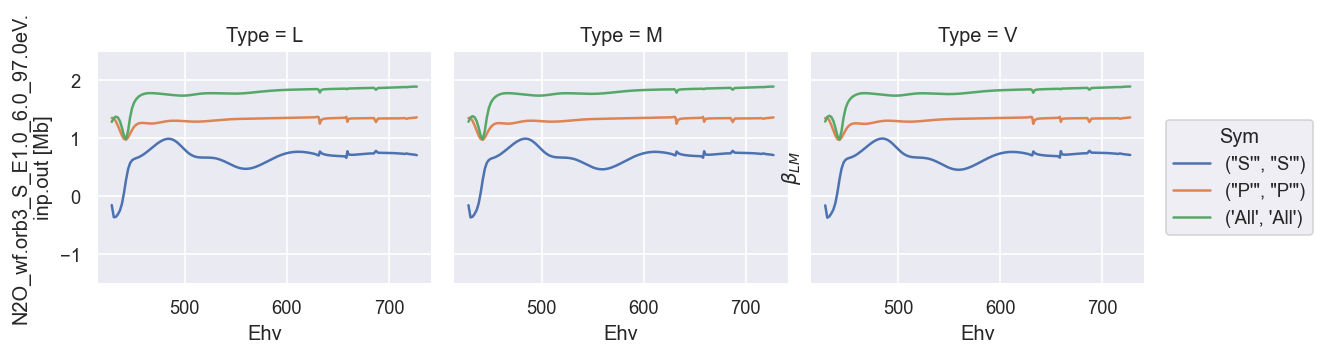

In [79]:
N2Odata.plotGetCro(pType='BETA', Etype='Ehv', Erange=Erange)

### XS vs Eke for reference

Same as above, but grid plots vs. Eke, since this is used for branching ratios below.

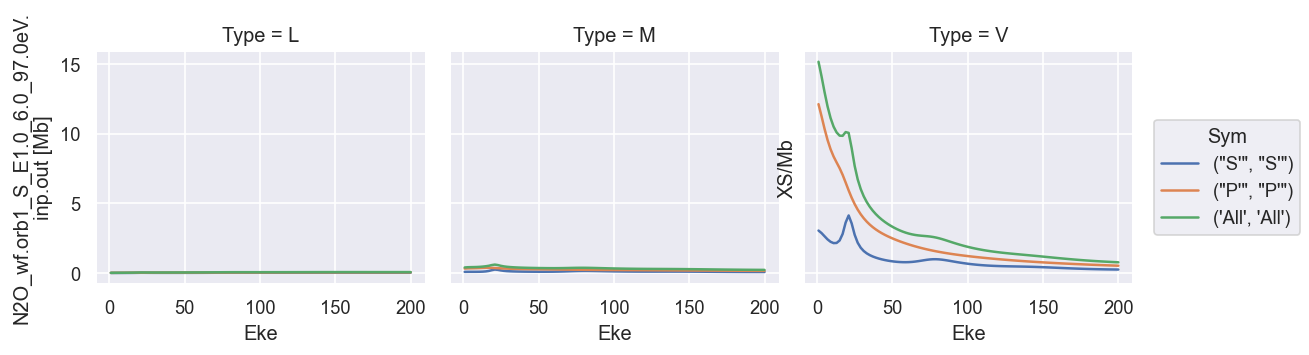

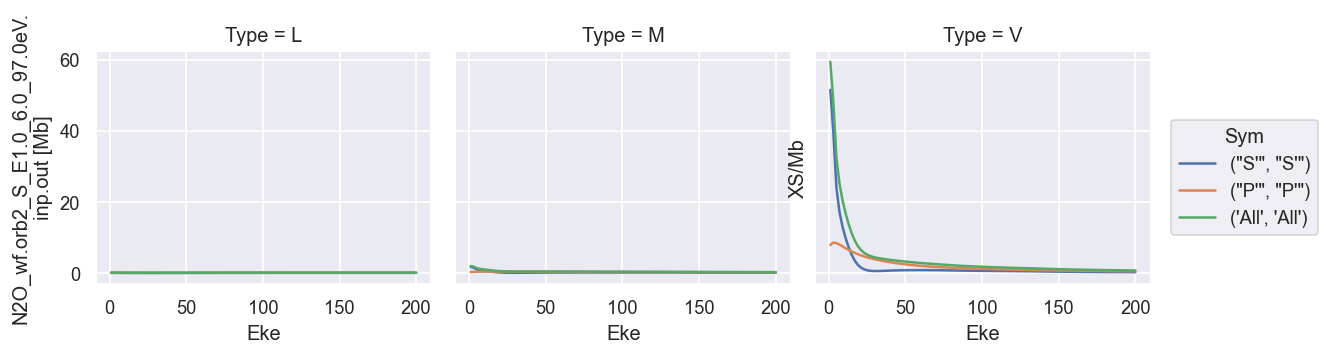

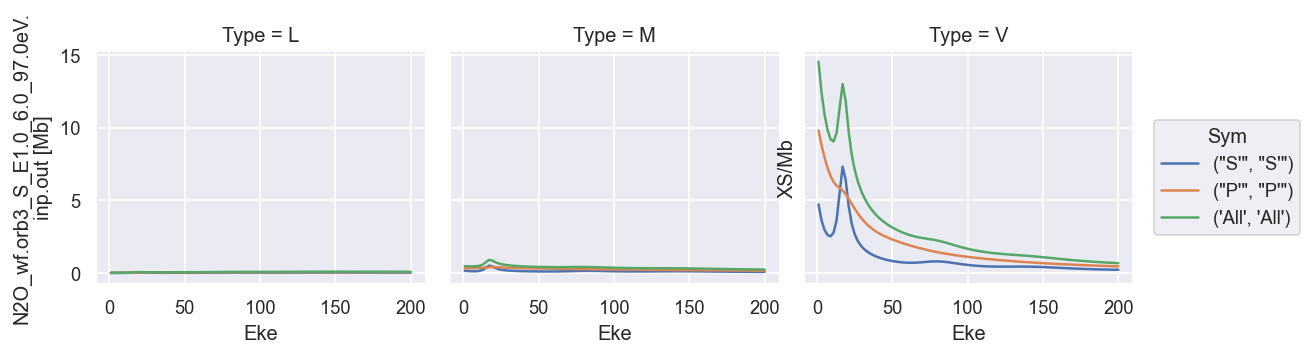

In [93]:
Etype = 'Eke'
Erange = [1,200]
N2Odata.plotGetCro(pType='SIGMA', Etype=Etype, Erange=Erange)

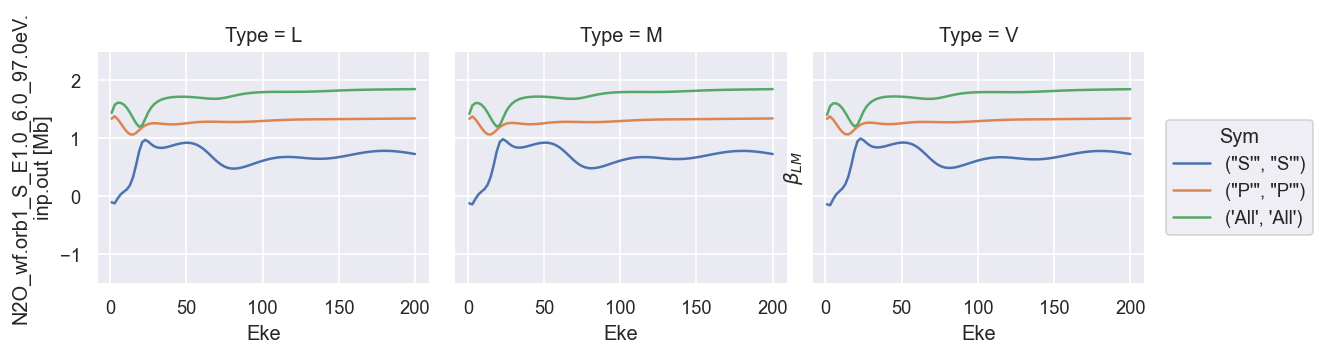

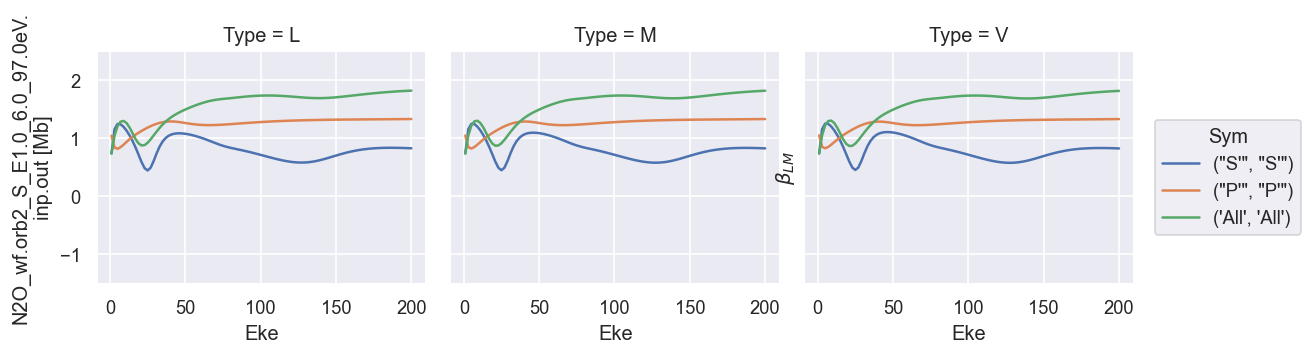

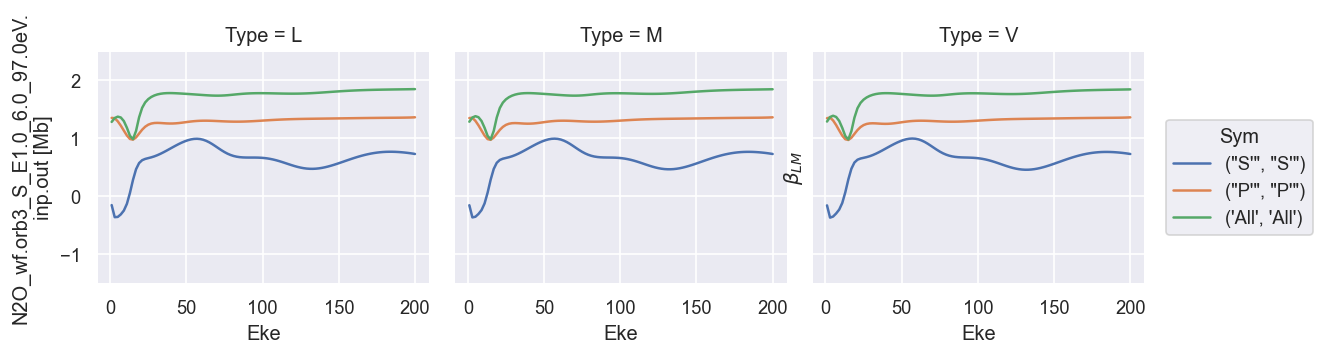

In [94]:
N2Odata.plotGetCro(pType='BETA', Etype=Etype, Erange=Erange)

## Branching ratios

To get a better feel for gauge-dependence, here are the branching ratios.

([Code adapted from recent XeF2 calcs.](https://phockett.github.io/ePSdata/XeF2-preliminary/XeF2_ePS-expt_comp_271020_4d_v111120-dist.html))

NOTE this code may need manual E limits in some cases, currently doesn't automatically set and can be an issue if different ranges or Estep.

In [85]:
# Stack XS data to new data structure
# NOTE: this is not quite correct, since it forces all data to same Ehv axis, but OK for a quick hack, and easy to pull out branching ratios
dsXS = xr.Dataset()  # Set blank dataset, this is easier for stacking, probably
lText = []

Etype = 'Eke'
ErangeBR = [1, 199]  # May be necessary to set this in some cases, set to None to skip

# for key in N2Odata.data.keys():
for key in ['orb1','orb2', 'orb3']:
    
    subset = N2Odata.data[key]['XS'].sel({'Sym':'All', 'XC':'SIGMA'})  # Set XS data, all syms only
    
    if ErangeBR is not None:
        subset = subset.sel(**{Etype:slice(ErangeBR[0], ErangeBR[1])})
    
#     # NOTE currently missing full dataset resolution for orb24, so try interp. (2eV not 1eV step size)
#     # Note dropna to ensure no NaNs, see http://xarray.pydata.org/en/latest/interpolation.html#interpolating-arrays-with-nan
#     if key == 'orb3':
#         subset = subset.dropna('Eke').interp(Eke = dsXS.Eke, method = 'cubic')
    
#     dsXS[key] = subset.copy()  # Set .copy() for safety here!
    dsXS[N2Odata.data[key]['jobNotes']['orbLabel']]  = subset.copy()  # Set .copy() for safety here!
    

# Convert to Xarray & normalise
dsXS = dsXS.to_array().rename({'variable':'channel'}).squeeze()
dsXS['total'] = dsXS.sum('channel')  # Sum over channels

# Normalise...
dsXS = dsXS/dsXS['total']

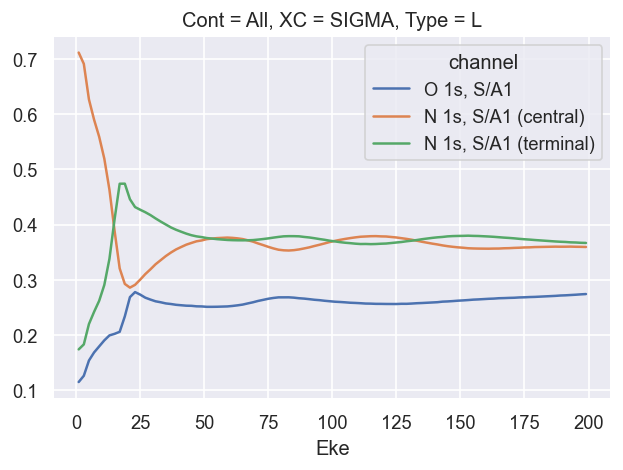

In [90]:
# Plot
# Etype = 'Ehv'
# Erange = [400, 550]
# Erange = [580, 750]
# dsXS.swap_dims({'Eke':'Ehv'}).sel(**{Etype:slice(Erange[0], Erange[1])}, Type='L').plot.line(x='Ehv');

Etype = 'Eke'
Erange = ErangeBR  # [1,100]
gauge = 'L'

# N2Odata.plotGetCroComp(pType='SIGMA', Etype=Etype, Erange=Erange, pGauge = gauge);
dsXS.sel(**{Etype:slice(Erange[0], Erange[1])}, Type=gauge).plot.line(x=Etype);

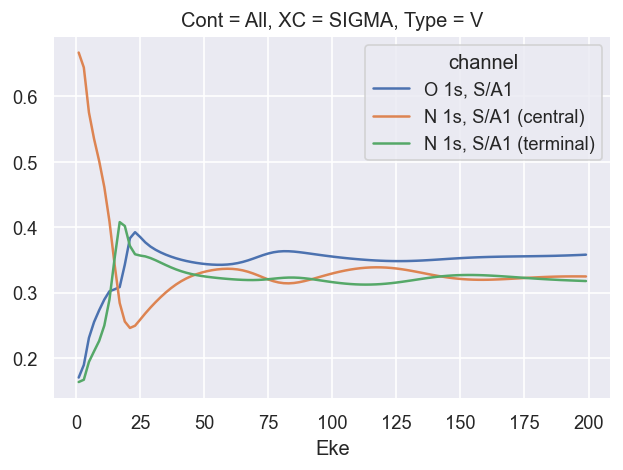

In [91]:
# Plot
# Etype = 'Ehv'
# Erange = [400, 550]
# Erange = [580, 750]
# dsXS.swap_dims({'Eke':'Ehv'}).sel(**{Etype:slice(Erange[0], Erange[1])}, Type='L').plot.line(x='Ehv');

Etype = 'Eke'
Erange = ErangeBR  # [1,100]
gauge = 'V'

# N2Odata.plotGetCroComp(pType='SIGMA', Etype=Etype, Erange=Erange, pGauge = gauge);
dsXS.sel(**{Etype:slice(Erange[0], Erange[1])}, Type=gauge).plot.line(x=Etype);

## Versions

In [95]:
import scooby
scooby.Report(additional=['epsproc', 'xarray', 'jupyter'])

--------------------------------------------------------------------------------
  Date: Fri Feb 12 18:01:39 2021 Eastern Standard Time

                OS : Windows
            CPU(s) : 32
           Machine : AMD64
      Architecture : 64bit
               RAM : 63.9 GB
       Environment : Jupyter

  Python 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]

           epsproc : 1.3.0-dev
            xarray : 0.15.0
           jupyter : Version unknown
             numpy : 1.19.2
             scipy : 1.3.0
           IPython : 7.12.0
        matplotlib : 3.3.1
            scooby : 0.5.6

  Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191125 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------